##  Data Exploration and Cleaning:

In [1]:

# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Importing datasets

user_interactions_df = pd.read_csv(r'C:\Users\jaisw\Downloads\user_interactions.csv')
purchase_data_df = pd.read_csv(r'C:\Users\jaisw\Downloads\purchase_data.csv')
website_performance_df = pd.read_csv(r'C:\Users\jaisw\Downloads\website_performance.csv')

# Check for missing data

user_interactions_missing = user_interactions_df.isnull().sum()
purchase_data_missing = purchase_data_df.isnull().sum()
website_performance_missing = website_performance_df.isnull().sum()

# Handle missing values

user_interactions_df.fillna(0, inplace=True)
purchase_data_df.fillna(0, inplace=True)
website_performance_df.fillna(0, inplace=True)


In [2]:
website_performance_df.head(10)


,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525
5,2023-06-01,7.333456,0.440715,0.048687
6,2023-07-01,3.372264,0.390081,0.048440
7,2023-08-01,7.115272,0.489165,0.038263
8,2023-09-01,8.384957,0.301692,0.063365
9,2023-10-01,2.468395,0.566843,0.065971


In [3]:
user_interactions_df.head(10)

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391
5,User_3384,Homepage,44
6,User_4461,Cart Page,146
7,User_435,Cart Page,335
8,User_2110,Checkout Page,570
9,User_149,Homepage,481


In [4]:
purchase_data_df.head(10)


,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23
5,Purchase_982,User_3759,Product_16,49.945558,2023-01-29 22:34:04
6,Purchase_950,User_4573,Product_18,181.501507,2023-07-24 06:13:14
7,Purchase_599,User_3228,Product_12,46.880509,2023-03-22 01:31:48
8,Purchase_613,User_691,Product_11,104.729904,2023-06-19 08:35:13
9,Purchase_81,User_940,Product_19,98.921151,2023-03-06 06:43:11


In [5]:

# Create dummies to create separate pages as a separate columns

page_dummies = pd.get_dummies(user_interactions_df['Page_Viewed'], prefix='page')
user_interactions_df = pd.concat([user_interactions_df, page_dummies], axis=1)

In [6]:
user_interactions_df.head(10)

,User_ID,Page_Viewed,Time_Spent_Seconds,page_Cart Page,page_Category Page,page_Checkout Page,page_Homepage,page_Product Page
0,User_3198,Homepage,560,False,False,False,True,False
1,User_126,Category Page,168,False,True,False,False,False
2,User_1376,Category Page,122,False,True,False,False,False
3,User_1117,Cart Page,329,True,False,False,False,False
4,User_3683,Category Page,391,False,True,False,False,False
5,User_3384,Homepage,44,False,False,False,True,False
6,User_4461,Cart Page,146,True,False,False,False,False
7,User_435,Cart Page,335,True,False,False,False,False
8,User_2110,Checkout Page,570,False,False,True,False,False
9,User_149,Homepage,481,False,False,False,True,False


##  User Behavior Analysis:

In [7]:

# Calculate most visited pages and average time spent

most_visited_pages = user_interactions_df['Page_Viewed'].value_counts().head(10)

In [8]:

# Calculation for average time spent on each page

average_time_per_page = user_interactions_df.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()

In [9]:

# Calculate click rates for homepage.

homepage_clicks = user_interactions_df[user_interactions_df['page_Homepage'] == 1]['User_ID'].count()

In [10]:
total_homepage_views = user_interactions_df['page_Homepage'].sum()

In [11]:
homepage_ctr = homepage_clicks / total_homepage_views

In [12]:

# Calcualtion for click-through rate for all pages.

page_to_selection_mapping = {
    'cart' : 'page_Cart Page',
    'category' : 'page_CategoryPage',
    'checkout' : 'page_CheckoutPage',
    'product' : 'page_ProductPage'
}

In [13]:
page_view_counts = user_interactions_df['Page_Viewed'].value_counts()

In [14]:
unique_users_count = user_interactions_df['User_ID'].nunique()

In [15]:
click_through_rate = (page_view_counts / unique_users_count).rename('CTR')

In [16]:
click_through_rate.index = click_through_rate.index.map(page_to_selection_mapping)

In [17]:

# Create data for data visualization of behaviour analysis.

most_visited_pages_data = most_visited_pages.values
most_visited_pages_labels = most_visited_pages.index
average_time_data = average_time_per_page.values

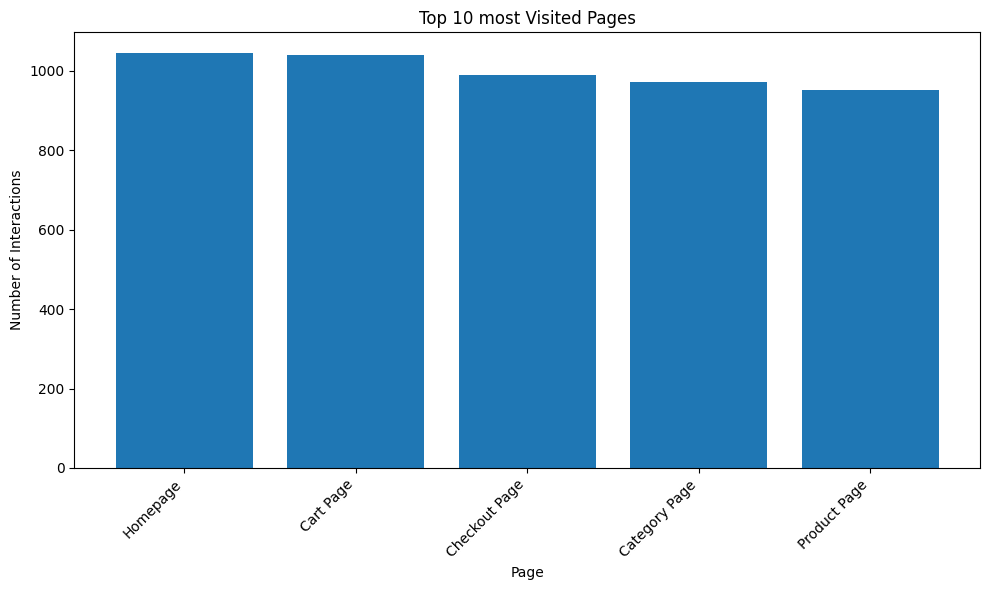

In [18]:

# Barchart for most visited pages.

plt.figure(figsize=(10,6))
plt.bar(most_visited_pages_labels, most_visited_pages_data)
plt.xlabel('Page')
plt.ylabel('Number of Interactions')
plt.title('Top 10 most Visited Pages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

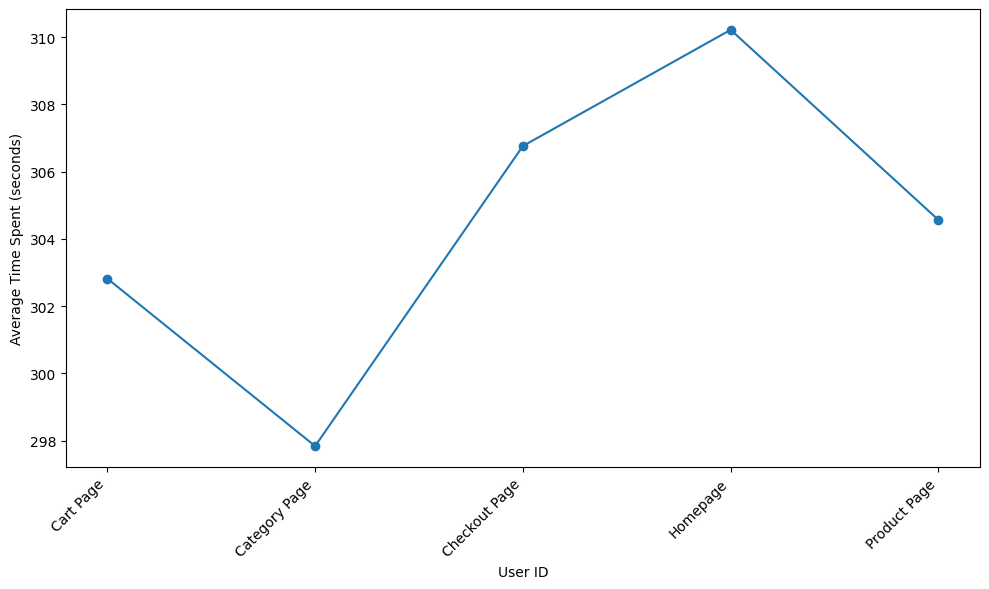

In [19]:

# Line plot for average time spent on page.

plt.figure(figsize=(10,6))
plt.plot(average_time_per_page.index, average_time_data, marker='o')
plt.xlabel('User ID')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

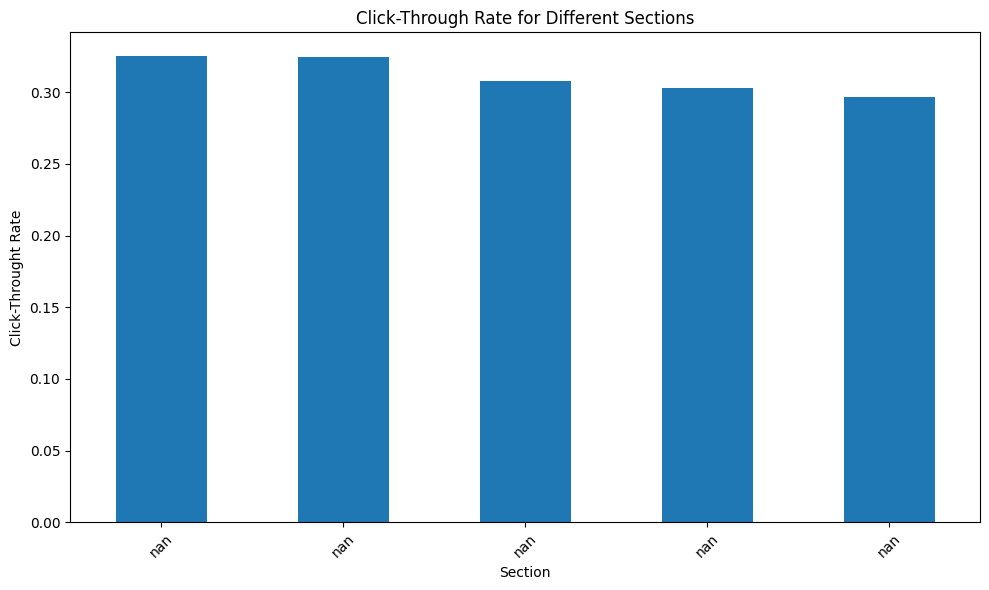

In [20]:

# Bar chart for click-through rate.

plt.figure(figsize=(10, 6))
click_through_rate.plot(kind='bar')
plt.xlabel('Section')
plt.ylabel('Click-Throught Rate')
plt.title('Click-Through Rate for Different Sections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##   Purchase Analysis:

In [21]:

# Calculate overall conversion rate for website based on purchase data.

overall_conversion_rate = purchase_data_df['User_ID'].nunique() / user_interactions_df['User_ID'].nunique()

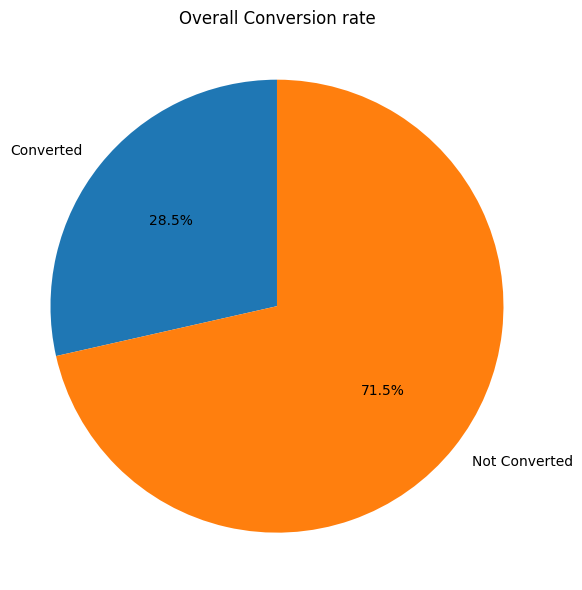

In [22]:
plt.figure(figsize=(6, 6))
plt.pie([overall_conversion_rate, 1-overall_conversion_rate], labels=['Converted', 'Not Converted'],autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Overall Conversion rate')
plt.tight_layout()
plt.show()

In [23]:

# Getting data and visual over top-selling-product.

top_selling_products = purchase_data_df['Product_ID'].value_counts().nlargest(5)

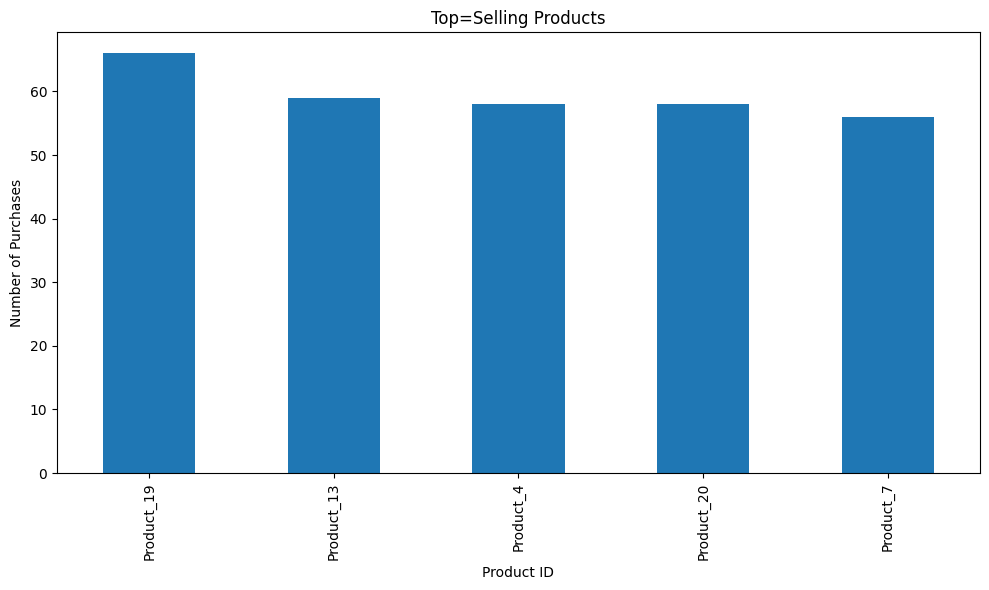

In [24]:
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.title('Top=Selling Products')
plt.tight_layout()
plt.show()

In [25]:

# Importing data for getting visual over top-selling categories.

product_categories_df = pd.read_csv(r'C:\Users\jaisw\OneDrive\Desktop\product_categories.csv')
product_categories_df.head(5)

,Purchase_ID,Product_Category
0,Purchase_948,Technology
1,Purchase_905,Furniture
2,Purchase_704,Technology
3,Purchase_766,Technology
4,Purchase_36,Technology


In [26]:
top_selling_product_categories = product_categories_df['Product_Category'].value_counts().nlargest(5)

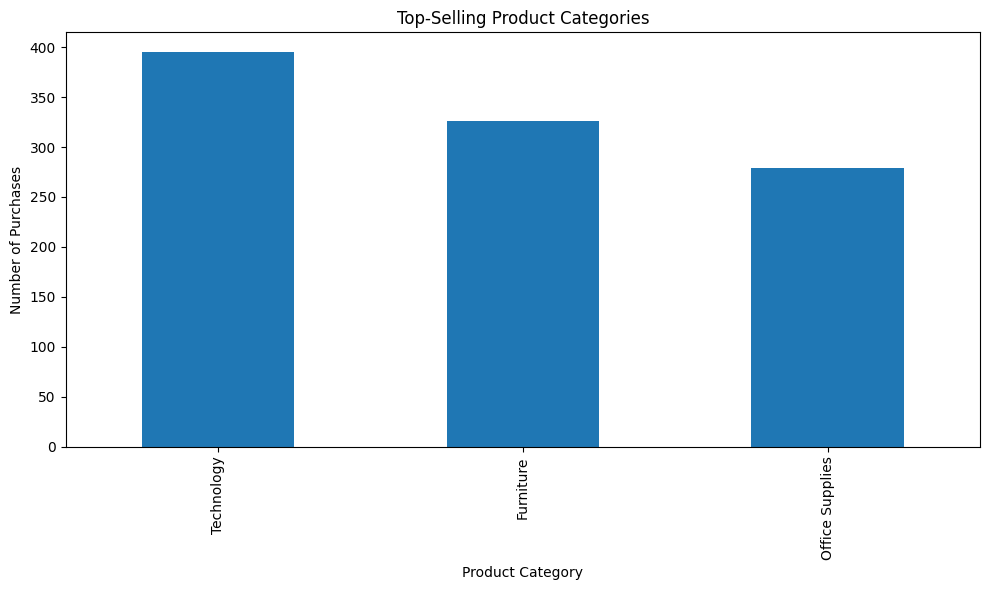

In [27]:

# visualization for top-selling product categories.

plt.figure(figsize=(10,6))
top_selling_product_categories.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.title('Top-Selling Product Categories')
plt.tight_layout()
plt.show()

In [28]:

# Calculate the likelihood of a purchase based on website interactions.

interactions_with_purchases = user_interactions_df.merge(purchase_data_df['User_ID'], how='inner')
likelihood_of_purchase = interactions_with_purchases['User_ID'].nunique() / user_interactions_df['User_ID'].nunique()

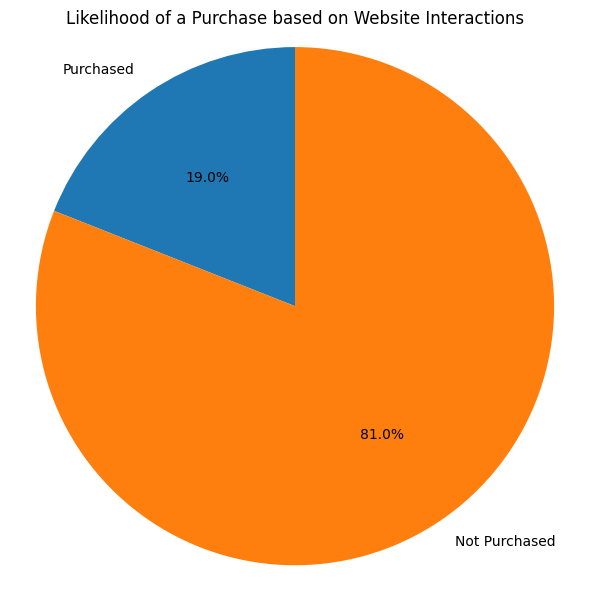

In [29]:

# Visualization for likelihood of a purchase based on website interactions.

plt.figure(figsize=(6, 6))
plt.pie([likelihood_of_purchase, 1 - likelihood_of_purchase], labels=['Purchased', 'Not Purchased'], autopct='%1.1f%%', startangle= 90)
plt.axis('equal')
plt.title('Likelihood of a Purchase based on Website Interactions')
plt.tight_layout()
plt.show()

##   Cohort Analysis:

In [30]:

# Extaract the signup month from the dataset purchase.

purchase_data_df['signup_month'] = pd.to_datetime(purchase_data_df['Purchase_Time']).dt.to_period('M')

In [31]:

# Groups users based on their month from the dataset purchase.

cohort_data = purchase_data_df.groupby(['signup_month', 'User_ID']).size().reset_index(name='transactions')

In [32]:

# Create a pivot table to calculate cohort size.

cohort_pivot = cohort_data.pivot_table(index='signup_month', columns='User_ID', values='transactions', aggfunc='count')

In [33]:
cohort_size = cohort_pivot.iloc[:, 0]

In [34]:

# Calculate retention rates for each cohort over time.

retention_rate = cohort_pivot.divide(cohort_size, axis=0)

In [35]:

# Determine the lifetime value (LTV) of customer.

cohort_ltv = purchase_data_df.groupby(['signup_month', 'User_ID'])['Transaction_Amount'].sum().reset_index(name='ltv')

In [36]:
cohort_ltv_pivot = cohort_ltv.pivot_table(index='signup_month', columns='User_ID', values='ltv', aggfunc='sum')

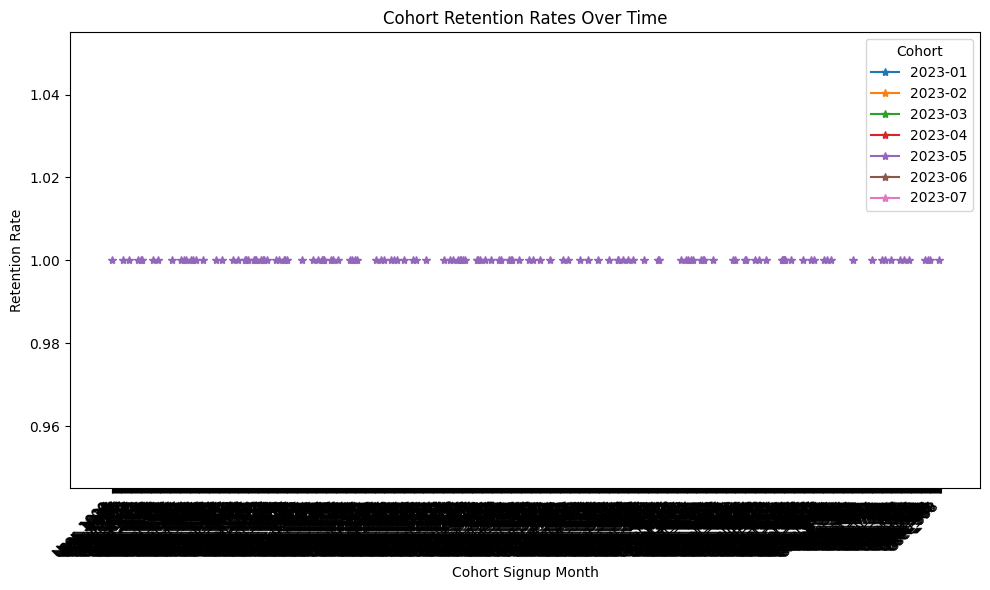

In [37]:

# Visusalization using matplotlib (i) line plot for cohort retention rate over time.

plt.figure(figsize=(10,6))
plt.plot(retention_rate.columns, retention_rate.T, marker='*')
plt.xlabel('Cohort Signup Month')
plt.ylabel('Retention Rate')
plt.title('Cohort Retention Rates Over Time')
plt.legend(retention_rate.index, title='Cohort')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

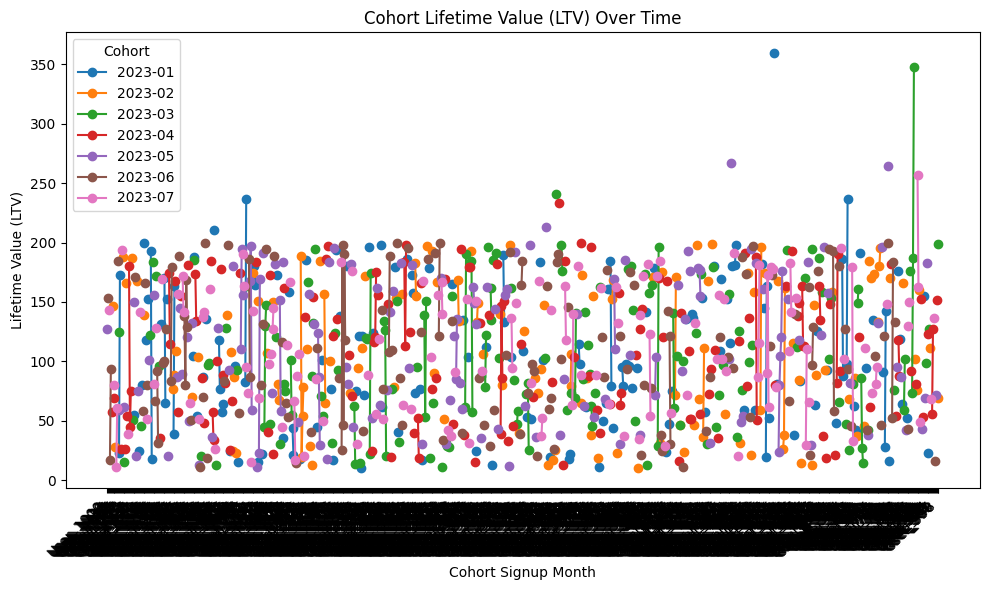

In [38]:

# (ii) Line plot for cohort LTV over time.

plt.figure(figsize=(10,6))
plt.plot(cohort_ltv_pivot.columns, cohort_ltv_pivot.T, marker='o')
plt.xlabel('Cohort Signup Month')
plt.ylabel('Lifetime Value (LTV)')
plt.title('Cohort Lifetime Value (LTV) Over Time')
plt.legend(cohort_ltv_pivot.index, title='Cohort')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##   Website Performance Optimization:

In [39]:

# calculate the average page load time, bounce rate, conversion rate.

average_page_load_time = website_performance_df['Page_Load_Time'].mean()
average_bounce_rate = website_performance_df['Bounce_Rate'].mean()
average_conversion_rate = website_performance_df['Conversion_Rate'].mean()

In [40]:

# Identify areas for improvement based on the metrics.

areas_for_improvement = []
if average_bounce_rate > 0.6:
    areas_for_improvement.append("High Bounce Rate: Streamline websit navigation and make it more user-friendly.")
    areas_for_improvement.append("Improve Mobile Experience: Optimize the website for better performance on mobile devices.")
    
if average_conversion_rate < 0.05:
    areas_for_improvement.append("Low Conversion Rate: Focus on Call-to-Action to boost conversion rate.")
    areas_for_improvement.append("Implement A/B Testing: Test different CTAs and page layouts to improve conversion.")    

In [41]:

# Propose Strategies for website performance optimization.

strategies = []

strategies.append("1. Optimize Page Load Time: Improve server response time and reduce image/video sizes.")
strategies.append("2. Enhance User Experience: Implement intutive navigation and personalized content.")
strategies.append("3. Implement A/B Testing: Test variations to identify high-performing elements.")
strategies.append("4. Optimize Mobile Experience: Ensure responsive design and fast load times for mobile users.")

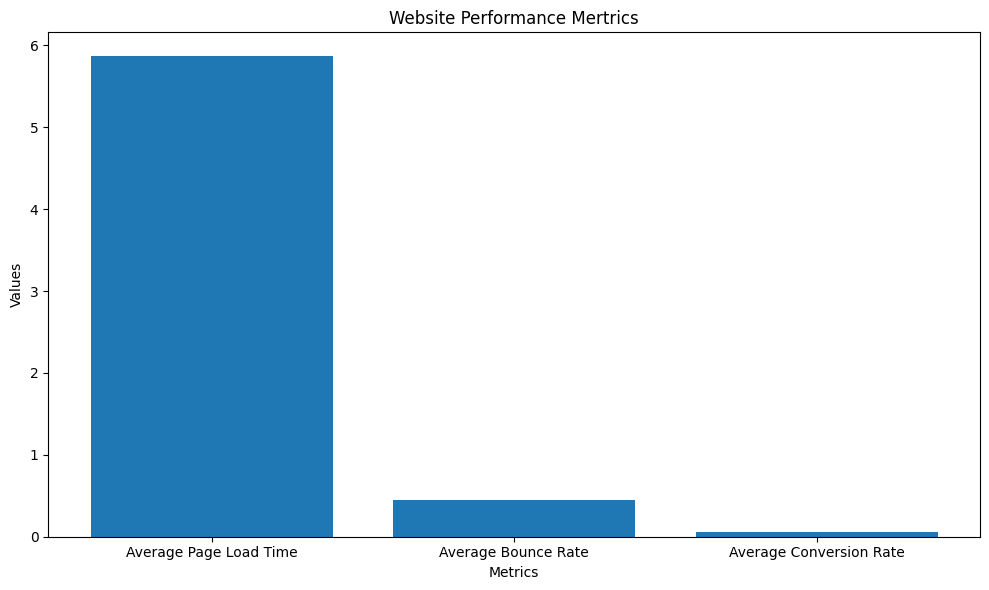

In [42]:

# Visualization as simple bar chart for website performance metrics.

plt.figure(figsize=(10, 6))
plt.bar(['Average Page Load Time', 'Average Bounce Rate', 'Average Conversion Rate'],
       [average_page_load_time, average_bounce_rate, average_conversion_rate])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Website Performance Mertrics')
plt.tight_layout()
plt.show()

Overall, the project aimed to gain insights into user behavior, website performance, and purchase data to make informed decisions on website optimization and customer retention. By performing these data analyses, you can better understand user preferences, identify areas of improvement, and optimize the website to enhance user experience and boost conversions.